# Contexto de la Base de Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Esta Base de datos trata sobre una aerolínea en donde los pasajeros no están muy contentos con el servicio otorgado, ya que algunos aspectos de los servicios obtenidos pueden ser catalogados como mediocres

# Descripción de Aproximación
Aproximación por Curiosidad

In [ ]:
#!pip install ydata_profiling

In [ ]:
import pandas as pd #libreria de lectura de doc, matemática etc...
import numpy as np #Librería de algebra, y clave del data Science
import seaborn as sns # Una de las muchas  librerias para gráficos(con la que tengo familiaridad)
import scipy.stats as stats #Liberia de estadística
from matplotlib import pyplot as plt
import plotly.express as px
import random
#import ydata_profiling
#Se agregarán más en cuanto avance el temario de clase

In [ ]:
Aerolinea = pd.read_csv('/content/drive/MyDrive/EstadisticaProyecto/Aerolinea/train.csv') #Asi el python puede leer la BD que es un CSV (COMA SEPARATED VALUES)
Aerolinea = Aerolinea.drop('Unnamed: 0', axis=1)
Aerolinea.head(5)
Aerolinea = Aerolinea.dropna()

In [ ]:
Aerolinea['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [ ]:
#limites del dataset son [0,25975]
#El tamaño total del dataset es de 25976 registros.

tam_muestra = 1000
viajes = Aerolinea.sample(n=tam_muestra, random_state=42) #es una muestra aleatoria de 9091 registros

In [ ]:
viajes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 18595 to 62965
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1000 non-null   int64  
 1   Gender                             1000 non-null   object 
 2   Customer Type                      1000 non-null   object 
 3   Age                                1000 non-null   int64  
 4   Type of Travel                     1000 non-null   object 
 5   Class                              1000 non-null   object 
 6   Flight Distance                    1000 non-null   int64  
 7   Inflight wifi service              1000 non-null   int64  
 8   Departure/Arrival time convenient  1000 non-null   int64  
 9   Ease of Online booking             1000 non-null   int64  
 10  Gate location                      1000 non-null   int64  
 11  Food and drink                     1000 non-null   

In [ ]:
viajes['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [ ]:
viajes.nunique()

id                                   1000
Gender                                  2
Customer Type                           2
Age                                    70
Type of Travel                          2
Class                                   3
Flight Distance                       667
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  5
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        5
Cleanliness                             5
Departure Delay in Minutes            113
Arrival Delay in Minutes              107
satisfaction                      

In [ ]:
factor = list(viajes.loc[:,viajes.nunique() < 10]);
viajes[factor] = viajes[factor].astype('category')
viajes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 18595 to 62965
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   id                                 1000 non-null   int64   
 1   Gender                             1000 non-null   category
 2   Customer Type                      1000 non-null   category
 3   Age                                1000 non-null   int64   
 4   Type of Travel                     1000 non-null   category
 5   Class                              1000 non-null   category
 6   Flight Distance                    1000 non-null   int64   
 7   Inflight wifi service              1000 non-null   category
 8   Departure/Arrival time convenient  1000 non-null   category
 9   Ease of Online booking             1000 non-null   category
 10  Gate location                      1000 non-null   category
 11  Food and drink                     100

In [ ]:
viajes.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
18595,49163,Female,Loyal Customer,66,Business travel,Eco,326,5,2,2,...,5,5,5,5,2,5,3,0,0.0,satisfied
19336,110026,Female,Loyal Customer,23,Personal Travel,Eco,1142,2,4,2,...,1,4,3,4,4,5,1,0,0.0,neutral or dissatisfied
72501,1215,Female,Loyal Customer,31,Personal Travel,Eco,309,1,5,1,...,5,4,3,5,5,4,5,0,0.0,neutral or dissatisfied
85210,96985,Female,Loyal Customer,50,Business travel,Eco,794,3,3,3,...,3,3,3,3,2,3,2,94,79.0,neutral or dissatisfied
87824,22269,Male,Loyal Customer,34,Business travel,Eco,143,4,5,3,...,4,3,2,4,2,4,4,0,0.0,satisfied


In [ ]:
Aerolinea.head(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Objetivo del Analisis Estadístico

Con este estudio se busca entender porque la gran mayoría de clientes de esta aerolínea no están contentos con el
servicio. El objetivo es definir un plan de mejora que contenga las accionies que deben realizarse en orden de relevancia con el fin de mejorar la experiencia de los usuarios.

In [ ]:
viajes.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,65693.869000,39.52600,1185.418000,15.522000,15.629000
std,37507.029184,15.12925,994.949319,55.164741,54.823544
min,70.000000,7.00000,67.000000,0.000000,0.000000
25%,33863.250000,27.00000,415.500000,0.000000,0.000000
50%,64654.500000,40.00000,859.000000,0.000000,0.000000
75%,98857.250000,51.00000,1679.250000,11.000000,12.000000
max,129806.000000,80.00000,3997.000000,1305.000000,1280.000000


In [ ]:
viajes.describe(exclude=np.number)

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,2,2,3,6,6,6,5,6,6,5,5,5,6,5,5,5,5,2
top,Female,Loyal Customer,Business travel,Eco,2,4,2,3,3,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,515,814,690,463,255,235,256,264,221,277,297,257,279,262,349,268,344,236,589


In [ ]:
viajes['Flight Distance'].head()

18595     326
19336    1142
72501     309
85210     794
87824     143
Name: Flight Distance, dtype: int64

# Ranking de variables  con respecto a la variable objetivo (Satisfaction) por medio de VCramer

In [1]:
# Eliminar variable objetivo continua
varObjBin = viajes['Class']
imputViajes = viajes.drop(['Class'],axis=1)
#funcion de Cramer
def cramers_v(var1, varObj):

    if not var1.dtypes == 'category':
        #bins = min(5,var1.value_counts().count())
        var1 = pd.cut(var1, bins = 5)
    if not varObj.dtypes == 'category': #np.issubdtype(varObj, np.number):
        #bins = min(5,varObj.value_counts().count())
        varObj = pd.cut(varObj, bins = 5)

    data = pd.crosstab(var1, varObj).values
    vCramer = stats.contingency.association(data, method = 'cramer')
    return vCramer
# Aplicar la función al input completo contra la objetivo
tablaCramer = pd.DataFrame(imputViajes.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])
cramertop7 = tablaCramer.VCramer.sort_values(ascending=False)[:7]
cramertop7 = pd.DataFrame(cramertop7,columns=['VCramer'])
px.bar(cramertop7,x=cramertop7.VCramer,title='Relaciones frente a Satisfacción').update_yaxes(categoryorder="total ascending").show()
#Este gráfico nos dice que variables tienen más importancia y más relevancia frente a la variable objetivo,
#esto quiere decir que entre mayor puntuacion se tenga en estas variables,
#mayor probabilidad de que el cliente haya dicho que esta satisfecho y lo mismo en caso contrario.

NameError: ignored

In [ ]:
viajes.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
viajes['Inflight wifi service'].describe()

count     1000
unique       6
top          2
freq       255
Name: Inflight wifi service, dtype: int64

In [ ]:
#ydata_profiling.ProfileReport(viajes)

# Variable Objetivo -> Satisfacción

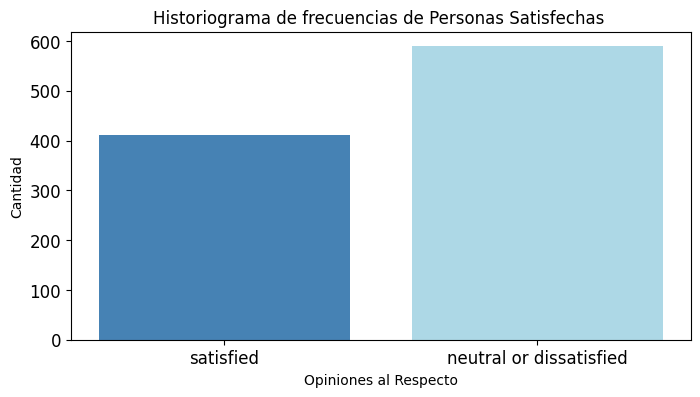

In [ ]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias de Personas Satisfechas ')

satisfechos = viajes.loc[viajes['satisfaction'] == 'satisfied']
Nosatisfechos = viajes.loc[viajes['satisfaction'] == 'neutral or dissatisfied']

# Obtener las frecuencias de las categorías
satisfechos_freq = len(satisfechos)
Nosatisfechos_freq = len(Nosatisfechos)

# Crear el gráfico de barras con las alturas correctas
plt.bar(['satisfied', 'neutral or dissatisfied'], [satisfechos_freq, Nosatisfechos_freq], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Opiniones al Respecto')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



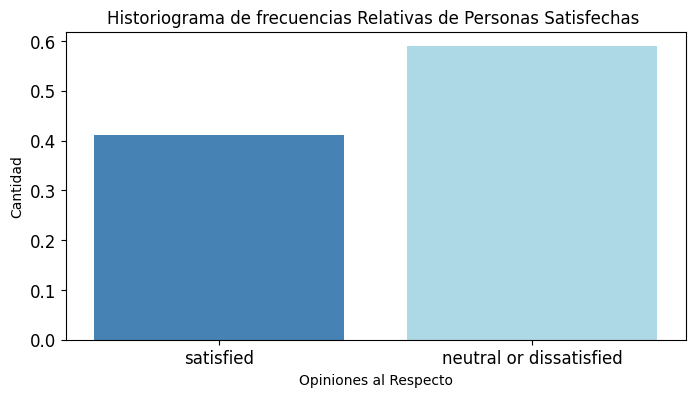

In [ ]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias Relativas de Personas Satisfechas ')
satisfechos = viajes.loc[viajes['satisfaction'] == 'satisfied']
Nosatisfechos = viajes.loc[viajes['satisfaction'] == 'neutral or dissatisfied']

# Obtener las frecuencias de las categorías
satisfechos_freq = len(satisfechos)
Nosatisfechos_freq = len(Nosatisfechos)
total = satisfechos_freq + Nosatisfechos_freq

satisfechos_rel = satisfechos_freq/total
Nosatisfechos_rel = Nosatisfechos_freq/total

# Crear el gráfico de barras con las alturas correctas
plt.bar(['satisfied', 'neutral or dissatisfied'], [satisfechos_rel, Nosatisfechos_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Opiniones al Respecto')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

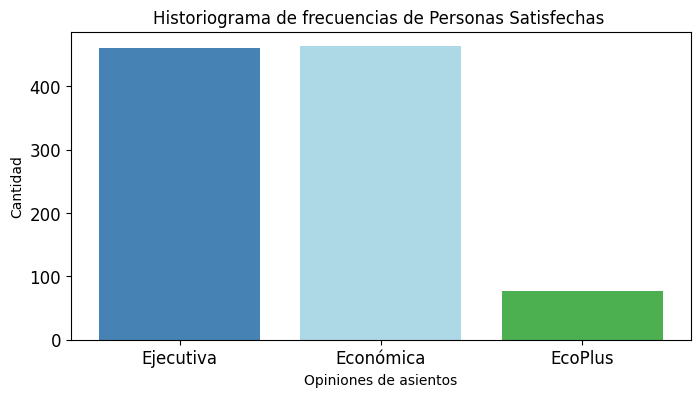

In [ ]:
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias de Personas Satisfechas ')

Ejecutiva = viajes.loc[(viajes.Class == 'Business')]
Economica = viajes.loc[(viajes.Class == 'Eco')]
EcoPlus = viajes.loc[(viajes.Class == 'Eco Plus')]

# Obtener las frecuencias de las categorías
Ejecutiva_freq = len(Ejecutiva)
Economica_freq = len(Economica)
EcoPlus_freq = len(EcoPlus)



# Crear el gráfico de barras con las alturas correctas
plt.bar(['Ejecutiva', 'Económica' , 'EcoPlus'], [Ejecutiva_freq, Economica_freq, EcoPlus_freq], color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Opiniones de asientos')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



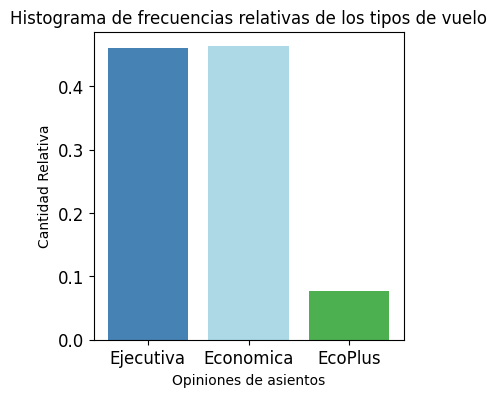

In [ ]:
plt.figure(figsize=(4, 4))
plt.title('Histograma de frecuencias relativas de los tipos de vuelo')
Ejecutiva = viajes.loc[viajes['Class'] == 'Business'].shape[0]
Economica = viajes.loc[viajes['Class'] == 'Eco'].shape[0]
EcoPlus = viajes.loc[viajes['Class'] == 'Eco Plus'].shape[0]
total = Ejecutiva + Economica + EcoPlus

# Obtener las frecuencias de las categorías
Ejecutiva_rel = Ejecutiva / total
Economica_rel = Economica / total
EcoPlus_rel = EcoPlus / total

# Crear el gráfico de barras con las alturas correctas
plt.bar(['Ejecutiva', 'Economica', 'EcoPlus'], [Ejecutiva_rel, Economica_rel, EcoPlus_rel], color=['#4682B4', '#ADD8E6', '#4CAF50'])

plt.xlabel('Opiniones de asientos')
plt.ylabel('Cantidad Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



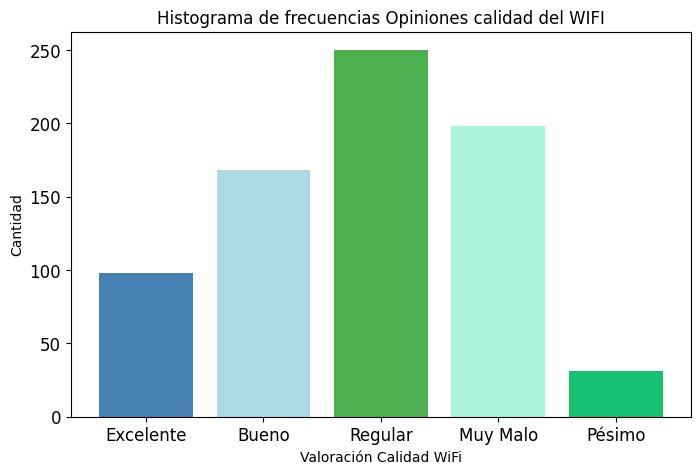

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Histograma de frecuencias Opiniones calidad del WIFI')
PesimoWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 0)])
MuyMalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 1)])
MalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 2)])
RegularWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 3)])
BuenWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 4)])
ExcelenteWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 5)])


P_freq = PesimoWifi
MM_freq = MuyMalWifi
M_freq = MalWifi
R_freq = RegularWifi
B_freq = BuenWifi
E_freq = ExcelenteWifi




plt.bar(['Excelente', 'Bueno' , 'Regular', 'Muy Malo','Pésimo'], [E_freq, B_freq, R_freq, MM_freq, P_freq],
        color=['#4682B4', '#ADD8E6', '#4CAF50' , '#AAF4D9', '#16C172'])

plt.xlabel('Valoración Calidad WiFi')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


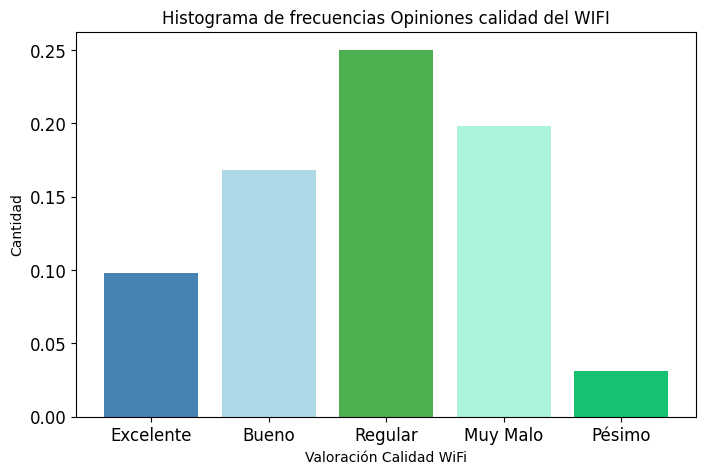

In [ ]:
plt.figure(figsize=(8, 5))
plt.title('Histograma de frecuencias Opiniones calidad del WIFI')
PesimoWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 0)])
MuyMalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 1)])
MalWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 2)])
RegularWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 3)])
BuenWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 4)])
ExcelenteWifi = len(viajes.loc[(viajes['Inflight wifi service'] == 5)])
total = PesimoWifi + MuyMalWifi + MalWifi + RegularWifi + BuenWifi + ExcelenteWifi

P_freq = PesimoWifi/total
MM_freq = MuyMalWifi/total
M_freq = MalWifi/total
R_freq = RegularWifi/total
B_freq = BuenWifi/total
E_freq = ExcelenteWifi/total




plt.bar(['Excelente', 'Bueno' , 'Regular', 'Muy Malo','Pésimo'], [E_freq, B_freq, R_freq, MM_freq, P_freq],
        color=['#4682B4', '#ADD8E6', '#4CAF50' , '#AAF4D9', '#16C172'])

plt.xlabel('Valoración Calidad WiFi')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


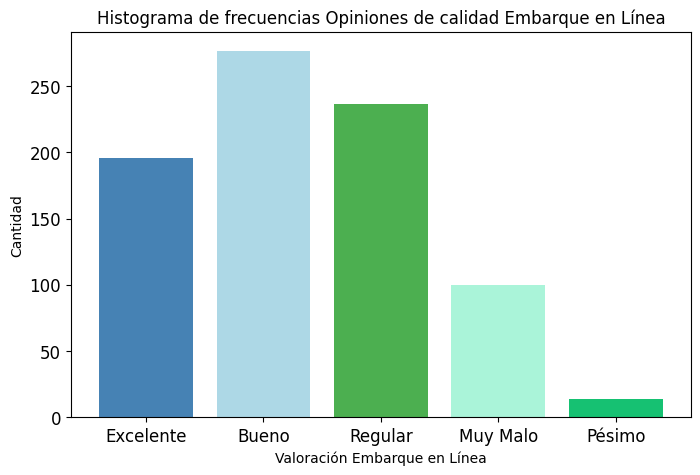

In [ ]:

plt.figure(figsize=(8, 5))
plt.title('Histograma de frecuencias Opiniones de calidad Embarque en Línea')
PesimoServ = len(viajes.loc[(viajes['Online boarding'] == 0)])
MuyMalServ = len(viajes.loc[(viajes['Online boarding'] == 1)])
MalServ = len(viajes.loc[(viajes['Online boarding'] == 2)])
RegularServ = len(viajes.loc[(viajes['Online boarding'] == 3)])
BuenServ = len(viajes.loc[(viajes['Online boarding'] == 4)])
ExcelenteServ = len(viajes.loc[(viajes['Online boarding'] == 5)])


P_freq = PesimoServ
MM_freq = MuyMalServ
M_freq = MalServ
R_freq = RegularServ
B_freq = BuenServ
E_freq = ExcelenteServ




plt.bar(['Excelente', 'Bueno' , 'Regular', 'Muy Malo','Pésimo'], [E_freq, B_freq, R_freq, MM_freq, P_freq],
        color=['#4682B4', '#ADD8E6', '#4CAF50' , '#AAF4D9', '#16C172'])

plt.xlabel('Valoración Embarque en Línea')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


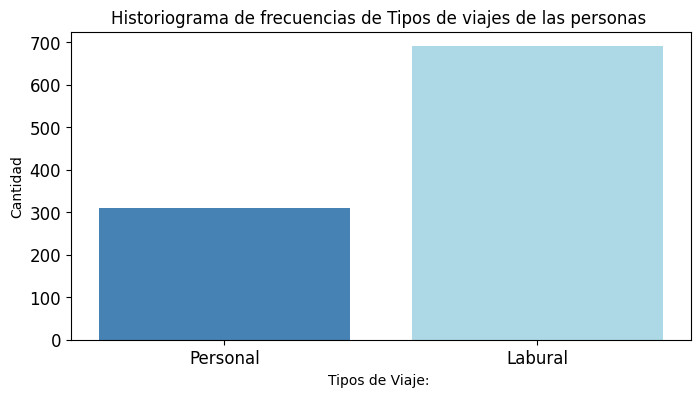

In [ ]:
#print(viajes['Type of Travel'].head())
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias de Tipos de viajes de las personas ')
Personal = len(viajes.loc[(viajes['Type of Travel'] == 'Personal Travel')])
Trabajo = len(viajes.loc[(viajes['Type of Travel'] == 'Business travel')])

# Obtener las frecuencias de las categorías
Personal_freq = Personal
Trabajo_freq = Trabajo




# Crear el gráfico de barras con las alturas correctas
plt.bar(['Personal', 'Labural'], [Personal_freq, Trabajo_freq], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Tipos de Viaje: ')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

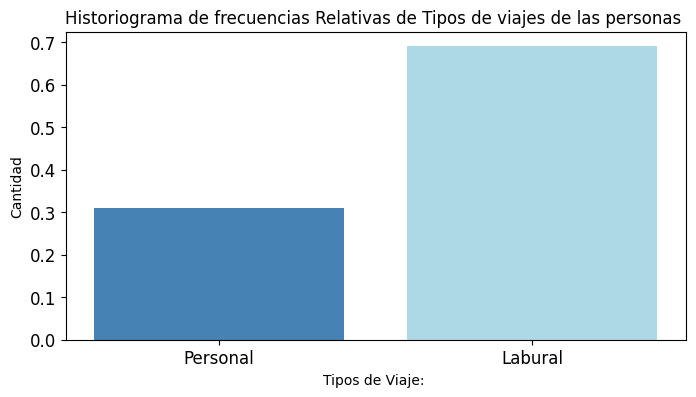

In [ ]:
#print(viajes['Type of Travel'].head())
plt.figure(figsize=(8, 4))
plt.title('Historiograma de frecuencias Relativas de Tipos de viajes de las personas ')
Personal = len(viajes.loc[(viajes['Type of Travel'] == 'Personal Travel')])
Trabajo = len(viajes.loc[(viajes['Type of Travel'] == 'Business travel')])
total = Personal + Trabajo
# Obtener las frecuencias de las categorías
Personal_freq = Personal/total
Trabajo_freq = Trabajo/total

# Crear el gráfico de barras con las alturas correctas
plt.bar(['Personal', 'Labural'], [Personal_freq, Trabajo_freq], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Tipos de Viaje: ')
plt.ylabel('Cantidad')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
def grafico_frecuencias(variable):
    frecuencias = variable.value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias.index, frecuencias.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia')
    plt.title('Gráfico de frecuencias')
    plt.show()


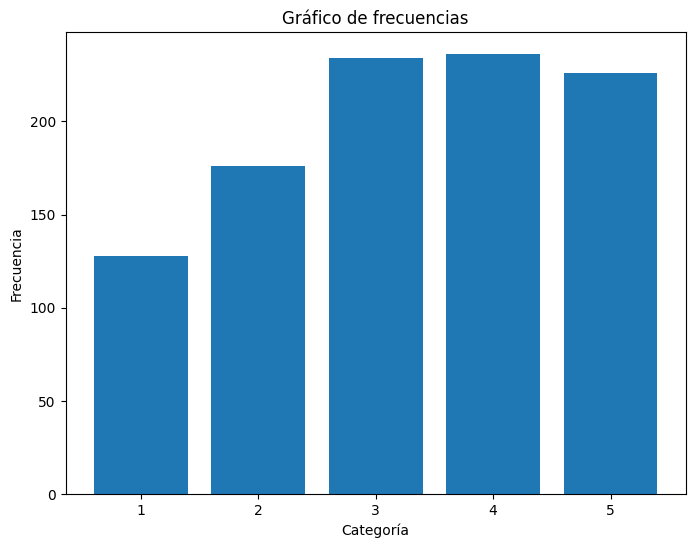

In [ ]:
grafico_frecuencias(viajes['Cleanliness'])

In [ ]:
def grafico_frecuencias_relativas(variable):
    frecuencias_relativas = variable.value_counts(normalize=True)
    plt.figure(figsize=(8, 6))
    plt.bar(frecuencias_relativas.index, frecuencias_relativas.values)
    plt.xlabel('Categoría')
    plt.ylabel('Frecuencia Relativa')
    plt.title('Gráfico de Frecuencias Relativas')
    plt.show()

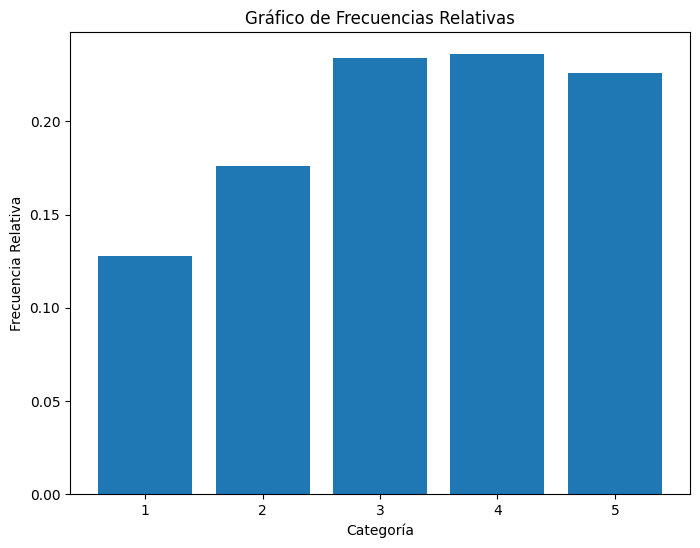

In [ ]:
grafico_frecuencias_relativas(viajes['Cleanliness'])

# Historiogramas Variable vs variable Objetivo

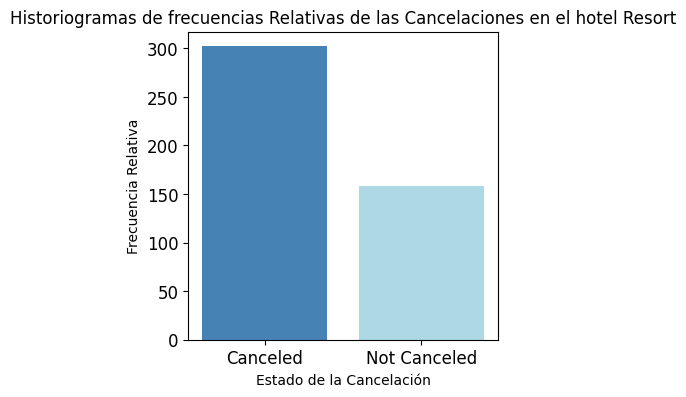

In [ ]:
# Historiograma de frecuencia Relativa
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de las Cancelaciones en el hotel Resort')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Business')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Business')])


plt.bar(['Canceled', 'Not Canceled'], [satisfechos, nosatisfechos], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Historiogramas de satisfaccion con respecto a su tipo de asiento

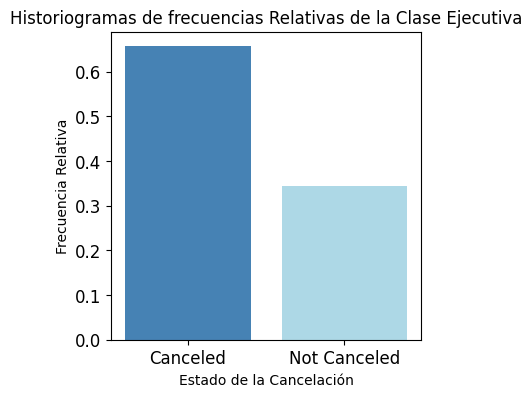

In [ ]:
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de la Clase Ejecutiva')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Business')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Business')])
total = satisfechos + nosatisfechos

satisfechos_rel = satisfechos / total
no_satisfechos_rel = nosatisfechos / total

plt.bar(['Canceled', 'Not Canceled'], [satisfechos_rel, no_satisfechos_rel], color=['#4682B4', '#ADD8E6'])

plt.xlabel('Estado de la Cancelación')
plt.ylabel('Frecuencia Relativa')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Casi un 31% no está satisfecho en la clase ejecutiva, redondeando, esto que de 3 personas que van en clase ejecutiva 1 no queda satisfecha. Si se obtuvo este ratio en la clase más prestigiosa me imagino que será incluso peor en las demás clases ofrecidas por la aerolinea.

Text(0, 0.5, 'Frecuencia Relativa')

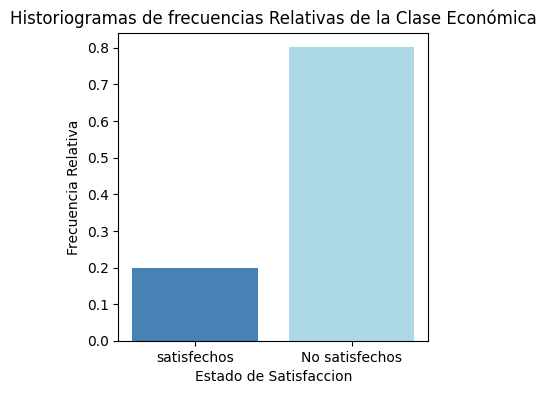

In [ ]:
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de la Clase Económica')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Eco')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Eco')])
total = satisfechos + nosatisfechos

satisfechos_rel = satisfechos / total
no_satisfechos_rel = nosatisfechos / total

plt.bar(['satisfechos', 'No satisfechos'], [satisfechos_rel, no_satisfechos_rel], color=['#4682B4', '#ADD8E6'])
plt.xlabel('Estado de Satisfaccion')
plt.ylabel('Frecuencia Relativa')


<BarContainer object of 2 artists>

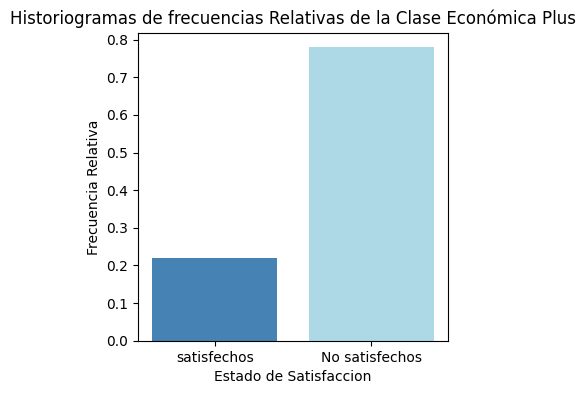

In [ ]:
plt.figure(figsize=(4, 4))
plt.title('Historiogramas de frecuencias Relativas de la Clase Económica Plus')

satisfechos = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes.Class == 'Eco Plus')])
nosatisfechos = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes.Class == 'Eco Plus')])
total = satisfechos + nosatisfechos

satisfechos_rel = satisfechos / total
no_satisfechos_rel = nosatisfechos / total
plt.xlabel('Estado de Satisfaccion')
plt.ylabel('Frecuencia Relativa')

plt.bar(['satisfechos', 'No satisfechos'], [satisfechos_rel, no_satisfechos_rel], color=['#4682B4', '#ADD8E6'])


# Historiogramas de calidad de WIFI vs variable objetivo




Son 5 categorías, para las cuales se quiere estudiar si esta satisfecho con respecto al viaje dependiendo al wifi, por lo cual agruparé las 5 categorías en 3 las cuales serán: {Mal Wifi: Pesimo-MUY MAL-MAL, Regular: Regular, Bueno: Buen, EXCELENTE}. Se perdera significancia en la data haciendo esto, pero como no se trabajará con Regresiones lineales, la lectura y expresion de los gráficos no se verá muy afectada.


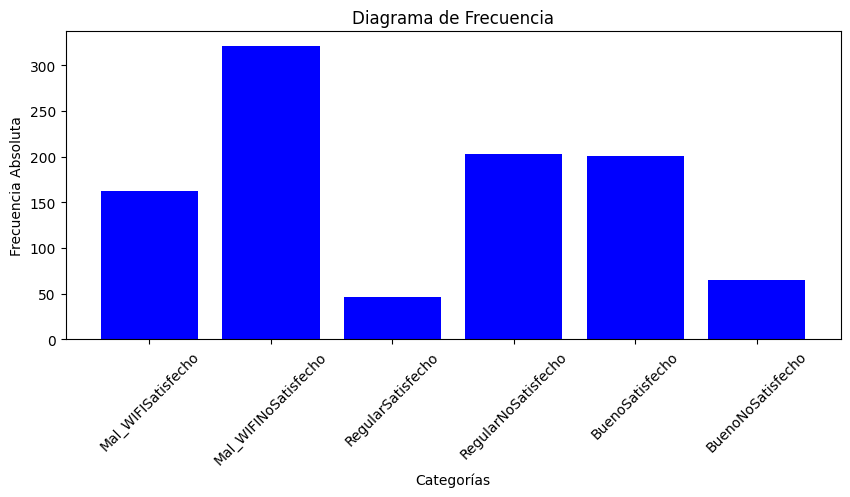

In [ ]:

MMM = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 0)])
NMMM = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 0)])
MM = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 1)])
NMM = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 1)])
M = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 2)])
NM = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 2)])

R = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 3)])
NR = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 3)])

B = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 4)])
NB = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 4)])

E = len(viajes.loc[(viajes.satisfaction == 'satisfied') & (viajes['Inflight wifi service'] == 5)])
NE = len(viajes.loc[(viajes.satisfaction == 'neutral or dissatisfied') & (viajes['Inflight wifi service'] == 5)])




Mal_WifiSatisfechos = {
    'Mal_WIFISatisfecho': MMM + MM + M
}

Mal_WifiNoSatisfecho = {
    'Mal_WIFINoSatisfecho': NMMM + NMM + NM
}

Regular_Satisfecho = {
    'RegularSatisfecho': R
}

Regular_NoSatisfecho = {
    'RegularNoSatisfecho': NR
}

Bueno_Satisfecho = {
    'BuenoSatisfecho': B + E
}

Bueno_NoSatisfecho = {
    'BuenoNoSatisfecho': NB + NE
}

categories = list(Mal_WifiSatisfechos.keys()) + list(Mal_WifiNoSatisfecho.keys()) + list(Regular_Satisfecho.keys()) + list(Regular_NoSatisfecho.keys()) + list(Bueno_Satisfecho.keys()) + list(Bueno_NoSatisfecho.keys())

frequencies = list(Mal_WifiSatisfechos.values()) + list(Mal_WifiNoSatisfecho.values()) + list(Regular_Satisfecho.values()) + list(Regular_NoSatisfecho.values()) + list(Bueno_Satisfecho.values()) + list(Bueno_NoSatisfecho.values())

# Configurar el gráfico
plt.figure(figsize=(10, 4))
plt.bar(categories, frequencies, color='blue')

# Añadir la categoría "Bueno_NoSatisfecho" al gráfico
plt.xticks(rotation=45)
plt.xlabel('Categorías')
plt.ylabel('Frecuencia Absoluta')
plt.title('Diagrama de Frecuencia')

plt.show()














Como se esperaba, mucha gente que tuvo mala experiencia con el wifi puntuo insatisfecho a la hora de viajar.

<Axes: xlabel='Online boarding', ylabel='count'>

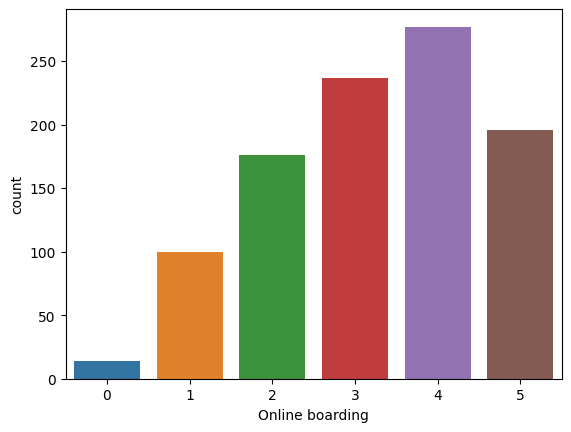

In [ ]:
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        fig = sns.countplot(x=col)
        return(fig)

# Aplicación a una variable en particular
cat_plot(viajes['Online boarding'])

<Axes: xlabel='Online boarding', ylabel='count'>

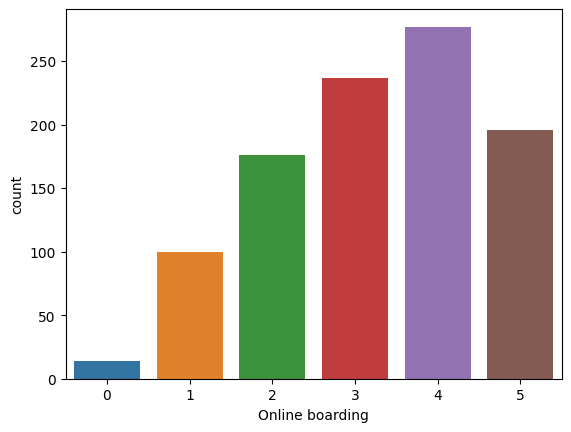

In [ ]:
def cat_plot(col):
     if col.dtypes == 'category':
        fig = px.bar(col.value_counts())
        fig = sns.countplot(x=col)
        return(fig)

# Aplicación a una variable en particular
cat_plot(viajes['Online boarding'])


18595    5
19336    2
72501    1
85210    3
87824    4
Name: Inflight wifi service, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

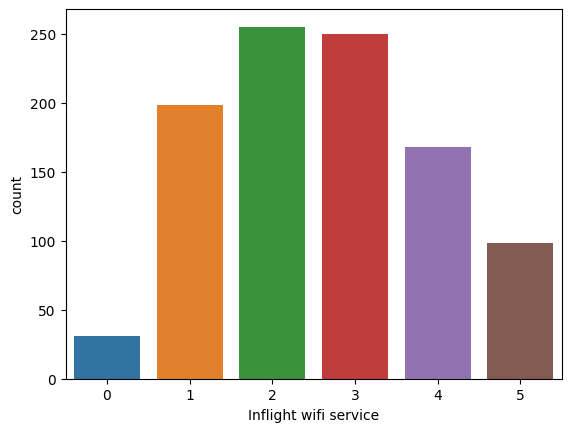

In [ ]:
cat_plot(viajes['Inflight wifi service'])
viajes['Inflight wifi service'].head()

<Axes: xlabel='Class', ylabel='count'>

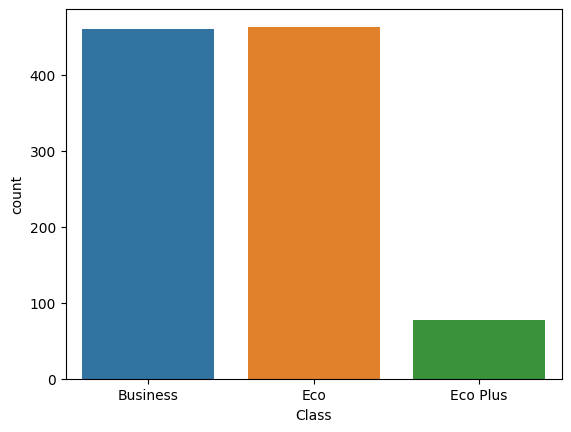

In [ ]:
cat_plot(viajes['Class'])

<Axes: xlabel='Type of Travel', ylabel='count'>

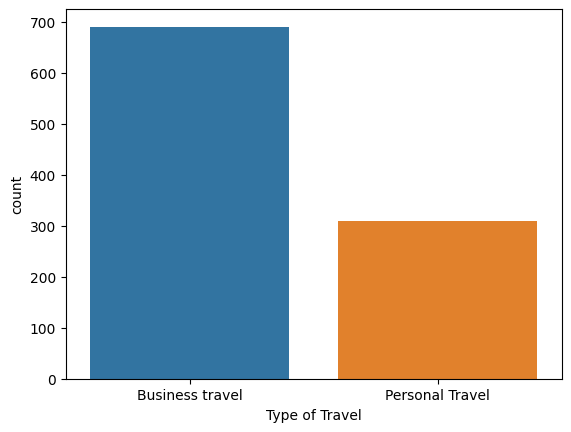

In [ ]:
cat_plot(viajes['Type of Travel'])

18595    5
19336    1
72501    5
85210    3
87824    4
Name: Inflight entertainment, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

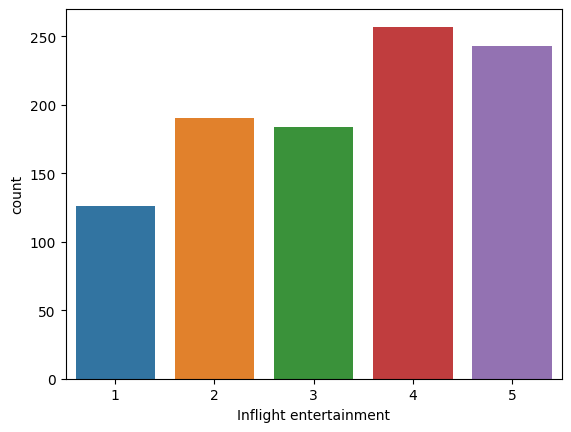

In [ ]:
cat_plot(viajes['Inflight entertainment'])
viajes['Inflight entertainment'].head()

18595    1
19336    1
72501    5
85210    3
87824    4
Name: Seat comfort, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]

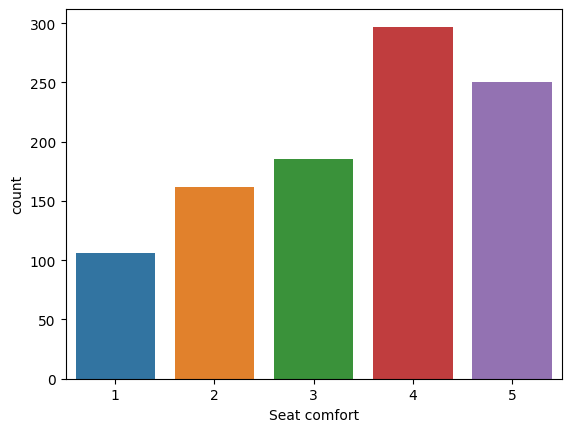

In [ ]:
cat_plot(viajes['Seat comfort'])
viajes['Seat comfort'].head()

<Axes: xlabel='Leg room service', ylabel='count'>

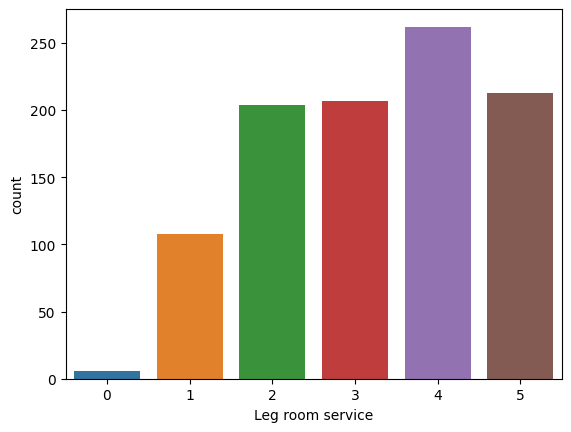

In [ ]:
cat_plot(viajes['Leg room service'])

In [ ]:
viajes['Leg room service'].head()

18595    5
19336    3
72501    3
85210    3
87824    2
Name: Leg room service, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [ ]:
viajes['satisfaction'].value_counts()

neutral or dissatisfied    589
satisfied                  411
Name: satisfaction, dtype: int64

In [ ]:
viajes['satisfaction'] = viajes['satisfaction'].apply(lambda x: 1 if x in ['satisfied'] else 0)
viajes.nunique()

id                                   1000
Gender                                  2
Customer Type                           2
Age                                    70
Type of Travel                          2
Class                                   3
Flight Distance                       667
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            5
Inflight entertainment                  5
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         5
Inflight service                        5
Cleanliness                             5
Departure Delay in Minutes            113
Arrival Delay in Minutes              107
satisfaction                      

In [ ]:
viajes['satisfaction'].value_counts()

0    589
1    411
Name: satisfaction, dtype: int64

<ipython-input-50-d46f75b40693>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



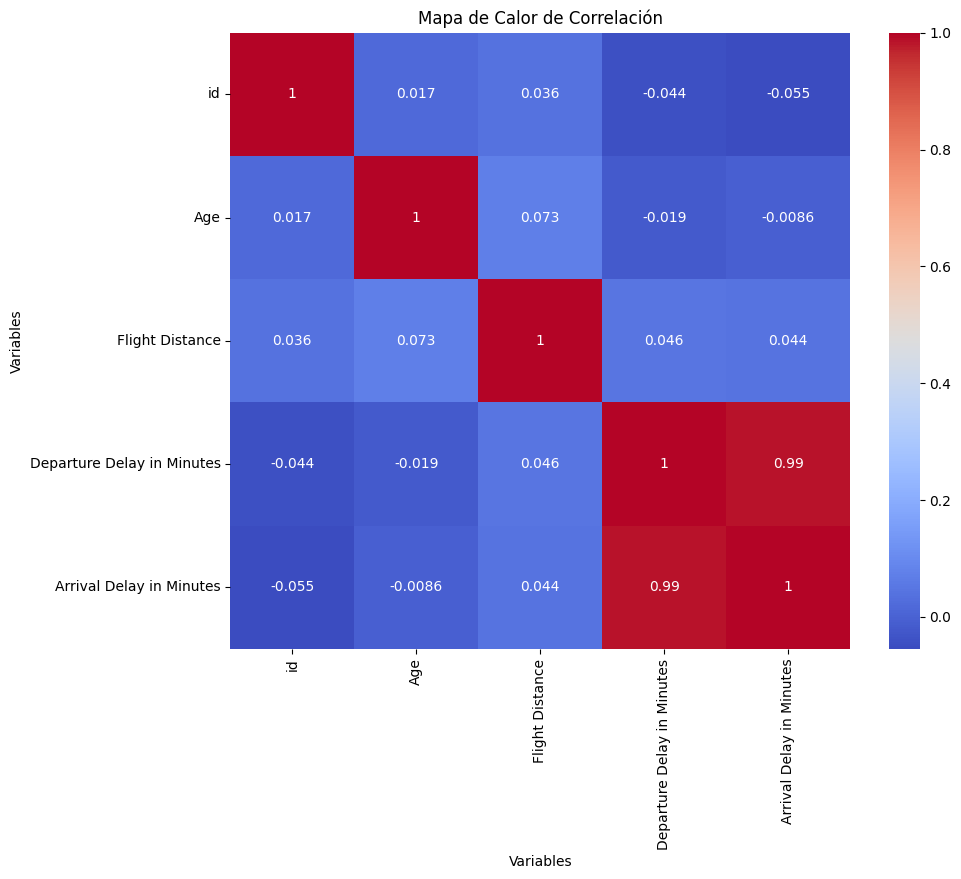

In [ ]:
correlation_matrix = viajes.corr()  # Calcula la matriz de correlación
plt.figure(figsize=(10, 8))



# Generar el mapa de calor utilizando Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')



# Personalizar el mapa de calor
plt.title('Mapa de Calor de Correlación')
plt.xlabel('Variables')
plt.ylabel('Variables')



# Mostrar el mapa de calor
plt.show()

In [ ]:
viajes['Class'] = viajes['Class'].replace('Business', 1)
viajes['Class'] = viajes['Class'].replace('Eco', 3)
viajes['Class'] = viajes['Class'].replace('Eco Plus', 2)
viajes.Class.value_counts()

3    463
1    460
2     77
Name: Class, dtype: int64

In [ ]:
Aerolinea.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
import statsmodels.api as sm



X = viajes['Class']
y = viajes['Flight Distance']



# Agregar una constante a X para estimar el término de intercepción
X = sm.add_constant(X)



# Crear un modelo de regresión lineal
model = sm.OLS(y, X)



# Ajustar el modelo a los datos
results = model.fit()



# Generar el resumen de la regresión
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Flight Distance   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     219.8
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           4.40e-45
Time:                        16:44:49   Log-Likelihood:                -8221.6
No. Observations:                1000   AIC:                         1.645e+04
Df Residuals:                     998   BIC:                         1.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2066.1786     65.894     31.356      0.0

In [ ]:
viajes['Class']=viajes['Class'].astype(int)

In [ ]:
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split



# Obtener los datos (X e y) para la regresión logística binaria
X = viajes[['Flight Distance', 'Age']]
y = viajes['Class']



# Agregar una columna de unos a X para el intercepto del modelo
X = sm.add_constant(X)



# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística binaria con statsmodels
model = sm.MNLogit(y_train, X_train)
result = model.fit()



# Obtener el resumen del modelo
summary = result.summary()



# Imprimir el resumen
print(summary)



Optimization terminated successfully.
         Current function value: 0.802933
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                  Class   No. Observations:                  800
Model:                        MNLogit   Df Residuals:                      794
Method:                           MLE   Df Model:                            4
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.1196
Time:                        16:44:50   Log-Likelihood:                -642.35
converged:                       True   LL-Null:                       -729.64
Covariance Type:            nonrobust   LLR p-value:                 1.087e-36
        Class=2       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0176      0.466     -2.182      0.029      -1.931      -0.104
Flight Distanc

Los coeficientes nos muestras que los valores de clase 1 son diferente a las clases 2 y 3, además que la clase 2 tiene odds más bajos que la clase 1, a diferencia la clase 3 tiene más odds ratios que la clase 1.
También podemos ver que la variable Flight Distance no tiene un impacto muy significativo sobre la variable de las clases debido a que el exponente es muy cercano por lo que la diferencia puede ser de muy pocos kilómetros, lo cual es muy poco. Con respecto a la edad la diferencia es igual de unos pocos años debido a que el coeficiente exponencial está muy cerca de 1.

In [ ]:
params = result.params

# Aplicar exponenciación a los coeficientes para interpretarlos

coeficientes_interpretados = np.exp(params)

print(coeficientes_interpretados)

                        0         1
const            0.361472  6.837713
Flight Distance  0.998996  0.998930
Age              1.009128  0.982236


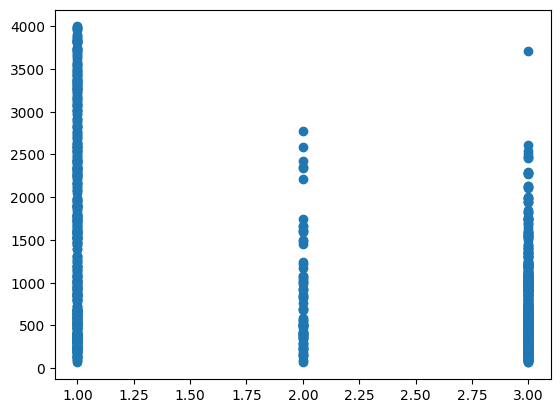

In [ ]:
plt.scatter(viajes['Class'], viajes['Flight Distance'])

La clase 1 tiende a viajar mayores distancia que las demás clases. Los puntos de dispersión se acumulan hasta las 4 000 millas. Y las clases 2 y 3 tienden a viajar menos distancias; viajan una distancia promedio de 2 000 millas.

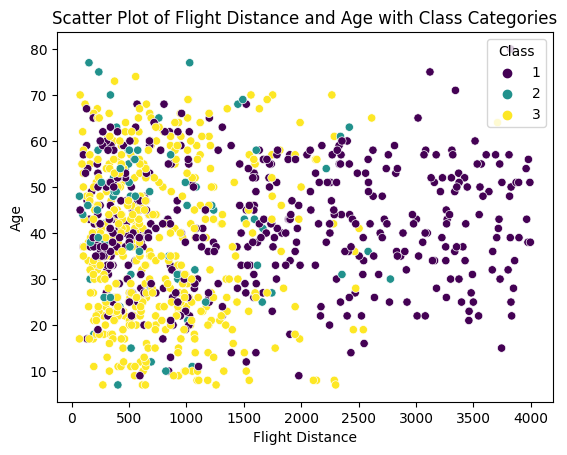

In [ ]:
# Data
X = viajes[['Flight Distance', 'Age']]
y = viajes['Class']

# Create a DataFrame combining X and y
data = X.copy()
data['Class'] = y

# Create a scatter plot
sns.scatterplot(x='Flight Distance', y='Age', hue='Class', data=data, palette='viridis')

# Set plot labels and title
plt.xlabel('Flight Distance')
plt.ylabel('Age')
plt.title('Scatter Plot of Flight Distance and Age with Class Categories')

# Show the plot
plt.show()

# Conclusion

En el gráfico de dispersión, podemos observar ciertas tendencias relacionadas con las diferentes clases de vuelos:

Clase 3: Los vuelos de 'Clase 3' tienden a tener distancias más cortas y suelen ser preferidos por personas con una edad promedio de 40 años. Además, esta clase es la que tiene más representación en el gráfico, lo que indica que es la más frecuente entre los datos analizados.

Clase 1: Por otro lado, los vuelos de 'Clase 1' parecen ser adquiridos con mayor frecuencia por personas mayores de 30 años, ya que los puntos asociados a esta clase se encuentran principalmente en esa región del gráfico.

Estas observaciones nos proporcionan una visión más clara de cómo la distancia de vuelo y la edad de los pasajeros pueden estar relacionadas con las diferentes clases de vuelos.